In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.mimic_calibration import _MimicCalibration
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
import numpy as np


In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
n_samples = 1000
X, y = make_classification(n_samples=3 * n_samples, n_features=6,random_state=42)
X -= X.min()
X_train, y_train = X[:n_samples], y[:n_samples]
X_calib, y_calib = X[n_samples:2 * n_samples], y[n_samples:2 * n_samples]
clf = MultinomialNB().fit(X_train, y_train)
y_calib_score = clf.predict_proba(X_calib)
y_calib_score = np.array([ score[1] for score in y_calib_score])
mimicObject = _MimicCalibration(threshold_pos=5, boundary_choice=2, record_history=True)
# sorted_index = y_calib_score.argsort()
# y_score = y_calib_score[sorted_index]
# y_target = y_calib[sorted_index]

# history_result = mimicObject.run_merge_function(current_binning, record_history=True)



In [4]:
y_calib_score.shape

(1000,)

In [5]:
y_calib.shape

(1000,)

In [6]:
boundary_table, calibrated_model = mimicObject._mimic_calibration(y_calib_score, y_calib)

In [7]:
len(mimicObject.history_record_table)

20

In [8]:
history = mimicObject.history_record_table

In [14]:
mimicObject.plot_history_result([0, 10, 15, 20])

plot history size: 20


AssertionError: The max of history index is number_of_history-1.             Please choose indexs between 0 and 19

In [83]:
def get_one_history(history_):
    score_array = []
    nP_array = []
    for row in history_:
        score = row[3]
        nP = row[6]
        score_array += [score]
        nP_array += [nP]
    return score_array, nP_array

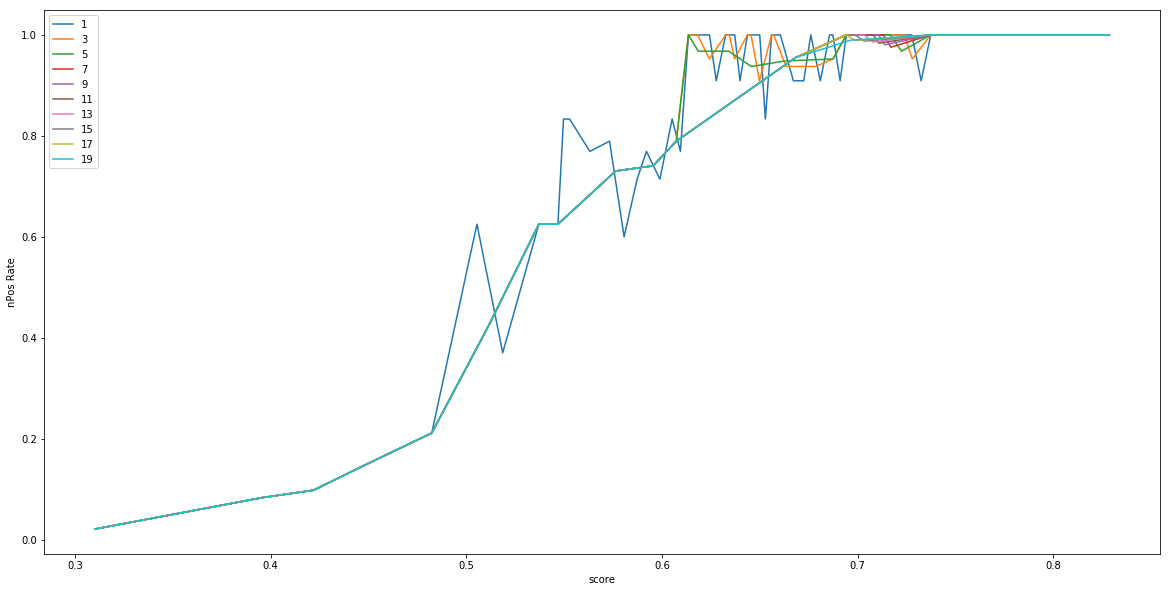

In [86]:
nhist = len(history)
for i in range(nhist):
    if(i%2 == 0):
        continue
    history_temp = history[i]
    x, y = get_one_history(history_temp)
    # print(x, y)
    plt.plot(x, y, label=str(i))
plt.xlabel("score")
plt.ylabel("nPos Rate")
plt.legend()

In [30]:
score_mean = history[0][3]
nPosRate_temp = history[0][-1]

In [40]:
history[-1]

[[0, 0, 1, 0.13793103448275862, 5, 29, 0.17241379310344829],
 [29, 1, 1, 1.0, 5, 7, 0.7142857142857143],
 [36, 1, 1, 1.0, 10, 11, 0.90909090909090906],
 [47, 1, 1, 1.0, 3, 3, 1.0]]

In [37]:
x

[0.13793103448275862, 1.0, 1.0, 1.0, 1.0]

In [35]:
len(y)

5

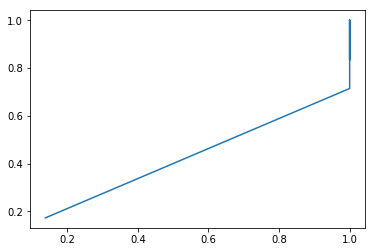

In [36]:
plt.plot(x, y)